## Importing Libraries

In [386]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


## Importing Data

In [387]:

df= pd.read_csv("train.csv")

## Describing Data

In [388]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [390]:

df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [391]:
df.duplicated().sum()

0

In [392]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Dropping id,customerId, Surname columns

In [393]:

df=df.drop(columns=['id','CustomerId','Surname'])


## Data Visualization

In [394]:
df['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [395]:
df['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

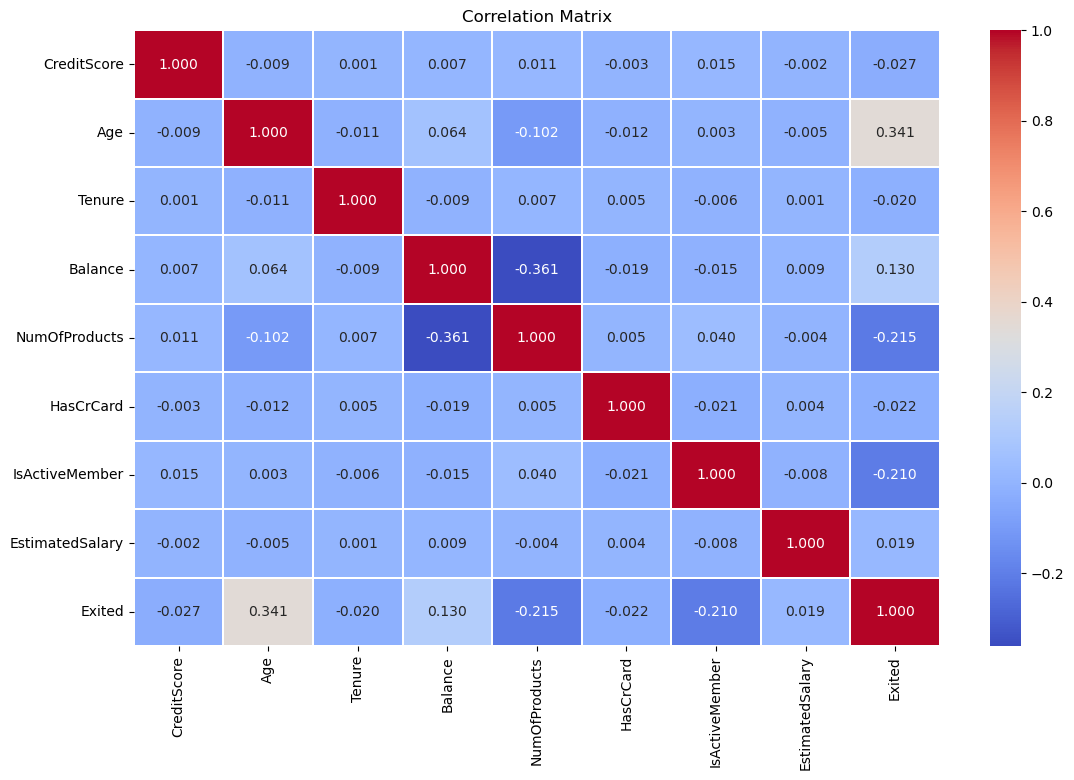

In [396]:
df_num= df.select_dtypes(include=['number'])
plt.figure(figsize=(13,8))
sns.heatmap(df_num.corr(), annot= True, cmap= 'coolwarm', linewidth= 0.2, fmt= "0.3f")
plt.title('Correlation Matrix')
plt.show()


<Axes: xlabel='Gender', ylabel='count'>

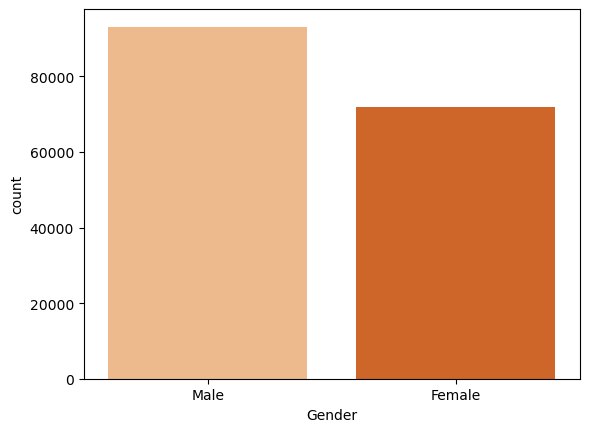

In [397]:
sns.countplot(data=df,x='Gender',palette='Oranges')

<Axes: xlabel='Geography', ylabel='count'>

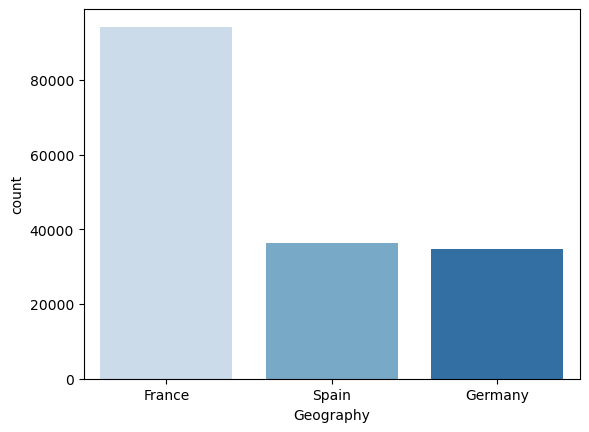

In [398]:
sns.countplot(data=df,x='Geography',palette='Blues')

## Define Target Variable (y) and Feature Variables (X)

In [399]:

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, FunctionTransformer, PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import f_classif           
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

import scipy.stats as stats

In [400]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [401]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03


## Train Test Split

In [402]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21156\2978544391.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['CreditScore'])


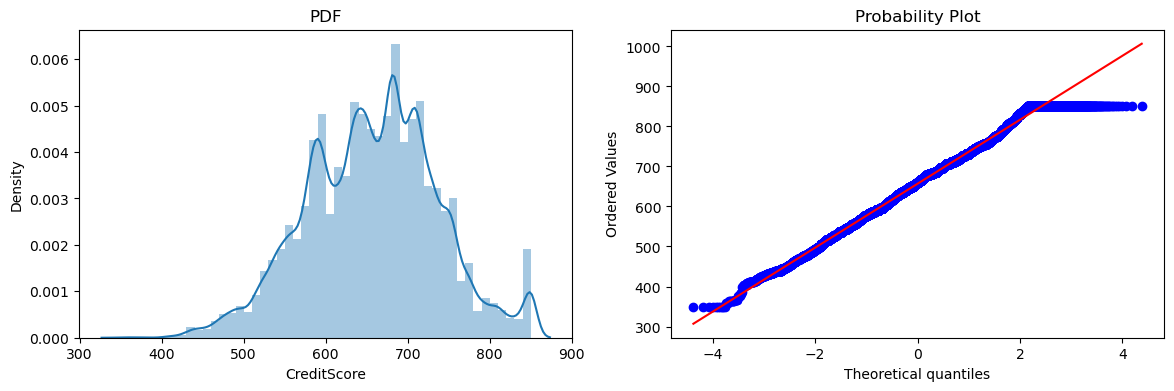

In [403]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['CreditScore'])
plt.title('PDF')

plt.subplot(122)
stats.probplot(X_train['CreditScore'],dist='norm',plot=plt)

plt.show()

In [404]:
X_train['CreditScore'].skew()

-0.054752699733534284

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21156\4178082720.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


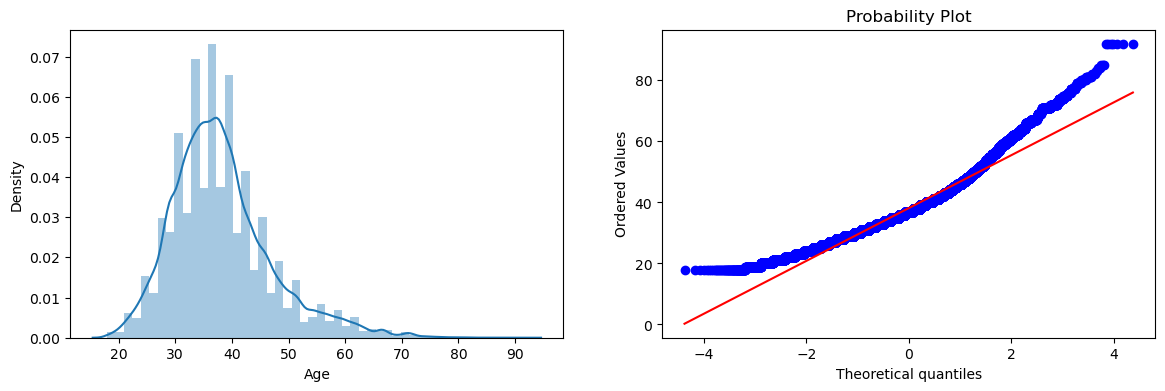

In [405]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)

plt.show()

In [406]:
X_train['Age'].skew()

0.963327547952653

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21156\404212559.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Tenure'])


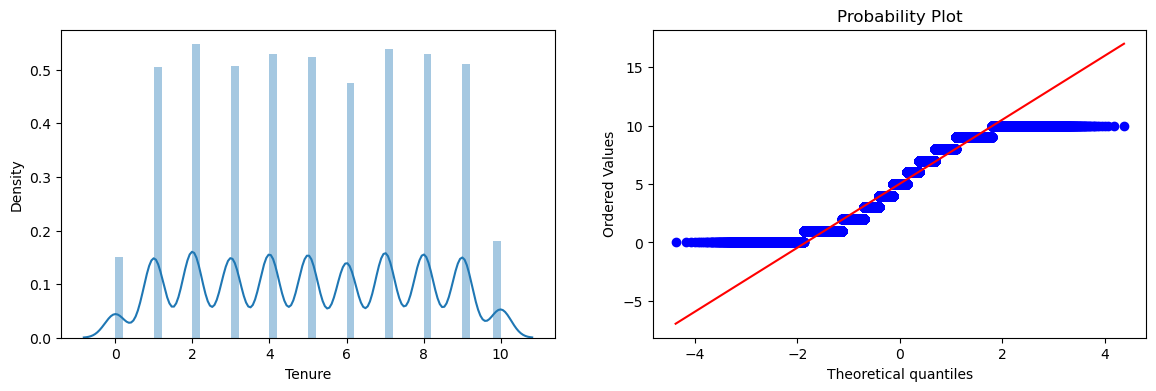

In [407]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Tenure'])

plt.subplot(122)
stats.probplot(X_train['Tenure'],dist='norm',plot=plt)

plt.show()

In [408]:
X_train['Tenure'].skew()

0.007355578647166757

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21156\1059389635.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Balance'])


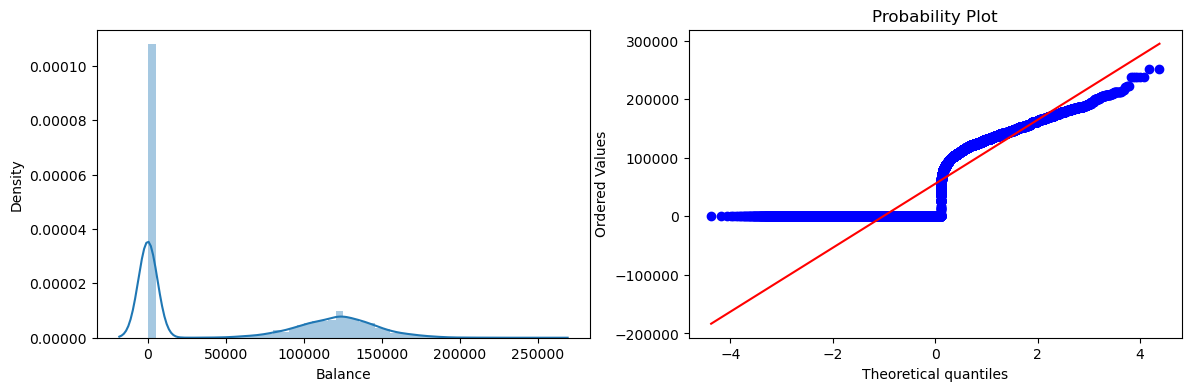

In [409]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Balance'])

plt.subplot(122)
stats.probplot(X_train['Balance'],dist='norm',plot=plt)

plt.show()

In [410]:
X_train['Balance'].skew()

0.37522661992301704

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21156\1876765091.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['EstimatedSalary'])


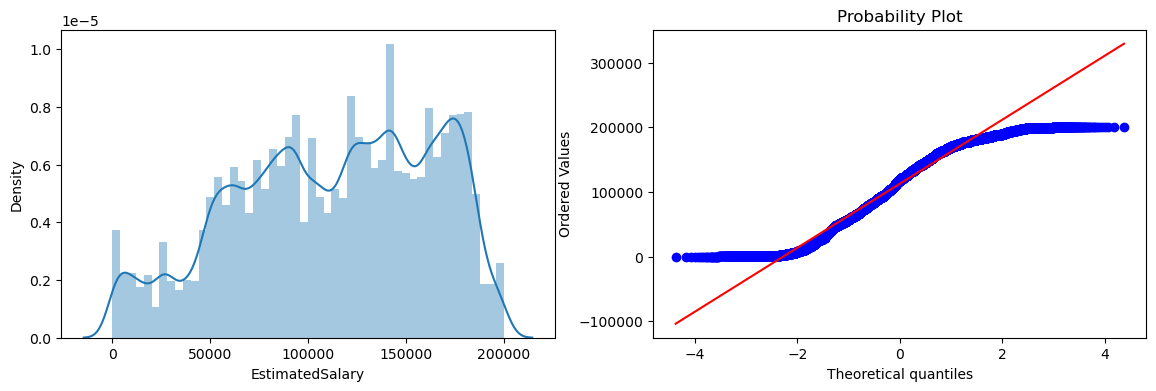

In [411]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['EstimatedSalary'])

plt.subplot(122)
stats.probplot(X_train['EstimatedSalary'], dist='norm', plot=plt)

plt.show()

In [412]:
X_train['EstimatedSalary'].skew()

-0.3089272545058014

## Modeling

In [413]:
trf1= ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[1,2]) 
],remainder='passthrough')


In [459]:
# trf5=ColumnTransformer([('log',FunctionTransformer(np.log1p),[3,5])],remainder='passthrough')
trf5=ColumnTransformer([('power',PowerTransformer(method='yeo-johnson', standardize=True),[3,5,9])],remainder='passthrough')

In [460]:
trf2= ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,13))
])

In [461]:
trf3= SelectKBest(score_func=chi2,k=10)

In [462]:
# trf4= DecisionTreeClassifier()
trf4= LogisticRegression()

In [463]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf5',trf5),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    
])

## Prediction

In [464]:
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

## Model Evaluation

In [465]:
print("Testing", np.mean(cross_val_score(pipe,X_test,y_test,cv=5,scoring='accuracy')))

Testing 0.836702930157531


In [466]:
print("Training", np.mean(cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy')))

Training 0.836655923802633


In [467]:
accuracy_score(y_pred,y_test)

0.837389670982206

In [468]:

pipe.named_steps['trf5'].named_transformers_['power'].lambdas_

array([-1.11674145,  1.14147544, -0.33551974])